In [5]:
import pandas as pd
total_data = pd.read_csv(r"https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")

In [6]:
total_data.to_csv(r"C:\Users\user\4Geeks\Módulos\Módulo22\time-series\data\raw\raw_data_time_series.csv")

In [7]:
total_data

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [8]:
total_data.dtypes

date      object
sales    float64
dtype: object

In [9]:
from datetime import datetime
total_data['date'] = total_data['date'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S.%f").strftime("%Y-%m-%d"))

In [10]:
total_data = total_data.set_index("date")

In [11]:
total_data

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415


In [12]:
total_data.to_csv(r"C:\Users\user\4Geeks\Módulos\Módulo22\time-series\data\processed\sel_data_time_series.csv")

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


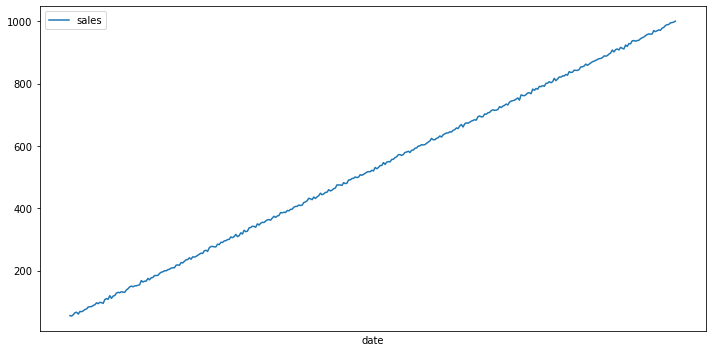

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)

plt.xticks([])
plt.tight_layout()

plt.show()

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(total_data, period = 12)
decomposition

## Tendencia

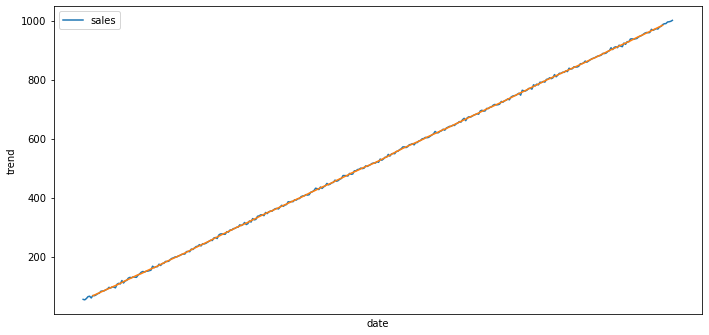

In [15]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = trend)

plt.tight_layout()
plt.xticks([])

plt.show()

Se observa una tendencia positiva a lo largo de los días

## Estacionalidad

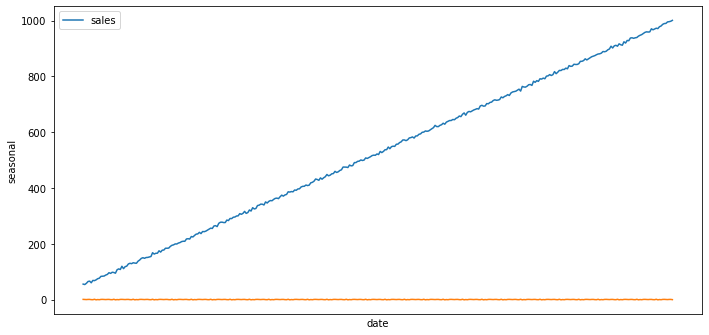

In [16]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = seasonal)

plt.tight_layout()
plt.xticks([])

plt.show()

In [17]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(total_data)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

$H_0$: La serie no es estacionaria  
$H_1$: La serie es estacionaria

Como el valor p es mayor a 0.05, esto significa que nuestra hipótesis nula no será rechazada y tomaremos esta serie como no estacionaria

## Análisis de la variabilidad

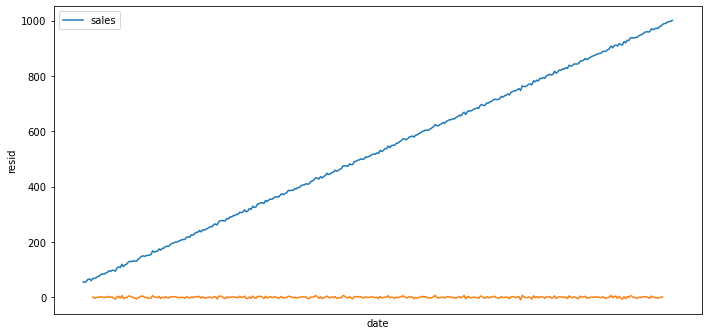

In [18]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = residual)

plt.tight_layout()
plt.xticks([])

plt.show()

## Análisis de la autocorrelación

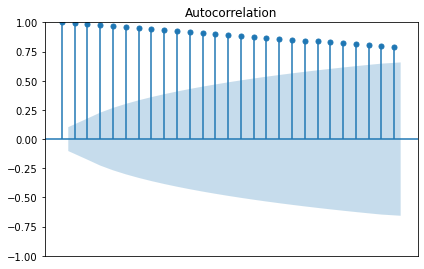

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(total_data)

plt.tight_layout()
plt.xticks([])

plt.show()

## Entrenamiento del modelo

In [20]:
# total_data_stationary = total_data.diff().dropna()

# test_stationarity(total_data_stationary)

In [21]:
# import pmdarima
from pmdarima import auto_arima
model = auto_arima(total_data, seasonal = False, trace = True, m = 12)

C:\Users\user\anaconda3\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.23 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.23 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.431 seconds


In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  366
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -915.776
Date:                Fri, 29 Dec 2023   AIC                           1839.552
Time:                        18:00:43   BIC                           1855.152
Sample:                    09-03-2022   HQIC                          1845.752
                         - 09-03-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.8110      0.134     21.055      0.000       2.549       3.073
ar.L1         -0.0821      0.052     -1.592      0.111      -0.183       0.019
ma.L1         -0.9413      0.020    -47.701      0.000      -0.980      -0.903
sigma2         8.7903      0.688     12.777      0.000       7.442      10.139
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.76
Prob(Q):                              1.00   Prob(JB):                         0.68
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
forecast = model.predict(30)
forecast

2023-09-04    1002.158117
2023-09-05    1004.831639
2023-09-06    1007.423258
2023-09-07    1010.021597
2023-09-08    1012.619384
2023-09-09    1015.217217
2023-09-10    1017.815046
2023-09-11    1020.412876
2023-09-12    1023.010705
2023-09-13    1025.608534
2023-09-14    1028.206364
2023-09-15    1030.804193
2023-09-16    1033.402023
2023-09-17    1035.999852
2023-09-18    1038.597681
2023-09-19    1041.195511
2023-09-20    1043.793340
2023-09-21    1046.391169
2023-09-22    1048.988999
2023-09-23    1051.586828
2023-09-24    1054.184658
2023-09-25    1056.782487
2023-09-26    1059.380316
2023-09-27    1061.978146
2023-09-28    1064.575975
2023-09-29    1067.173805
2023-09-30    1069.771634
2023-10-01    1072.369463
2023-10-02    1074.967293
2023-10-03    1077.565122
Freq: D, dtype: float64

In [24]:
forecast = pd.DataFrame({'forecast': forecast})
forecast

,forecast
2023-09-04,1002.158117
2023-09-05,1004.831639
2023-09-06,1007.423258
2023-09-07,1010.021597
2023-09-08,1012.619384
2023-09-09,1015.217217
2023-09-10,1017.815046
2023-09-11,1020.412876
2023-09-12,1023.010705
2023-09-13,1025.608534


In [25]:
forecast.index = forecast.index.strftime('%Y-%m-%d')

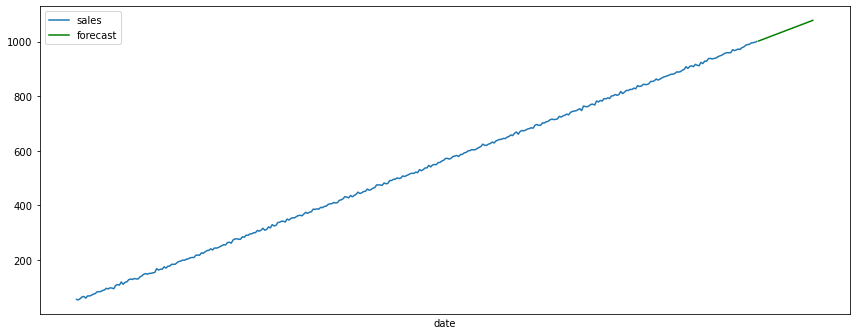

In [26]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (12, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = forecast, palette=['green'])

plt.tight_layout()
plt.xticks([])

plt.show()

In [27]:
from pickle import dump, load

In [28]:
dump(model, open(r"C:\Users\user\4Geeks\Módulos\Módulo22\time-series\models\time_series_model.pkl", "wb"))

In [29]:
# !git clone https://github.com/orj93/time-series.git

In [49]:
!git add C:\Users\user\4Geeks\Módulos\Módulo22\time-series\data\raw\raw_data_time_series.csv

In [50]:
!git add C:\Users\user\4Geeks\Módulos\Módulo22\time-series\data\processed\sel_data_time_series.csv

In [51]:
!git add C:\Users\user\4Geeks\Módulos\Módulo22\time-series\models\time_series_model.pkl

In [52]:
!git commit -m "Modelo de serie temporal no estacionaria"

[main 2c9740b] Modelo de serie temporal no estacionaria
 1 file changed, 367 insertions(+)
 create mode 100644 data/processed/sel_data_time_series.csv


In [53]:
!git push origin main

To https://github.com/orj93/time-series.git
   e945768..2c9740b  main -> main


In [40]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   time series no estacionaria.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../data/processed/sel_data_time_series.csv
	../data/raw/raw_data_time_series.csv
	../models/time_series_model.pkl

no changes added to commit (use "git add" and/or "git commit -a")


In [39]:
!git checkout main

M	src/time series no estacionaria.ipynb
Your branch is up to date with 'origin/main'.


Already on 'main'


In [45]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	new file:   ../data/raw/raw_data_time_series.csv

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   time series no estacionaria.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	../data/processed/sel_data_time_series.csv
	../models/time_series_model.pkl

